<a href="https://colab.research.google.com/github/FirasBellakhel/deep-learning-cats-and-dogs-/blob/main/catsanddogsnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
import os
import glob
import tensorflow as tf 
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras

from tensorflow.keras import layers
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator

In [ ]:

from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/MyDrive/Data/"



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
cat.4001.jpg  cat.4023.jpg  cat.4045.jpg  dog.4012.jpg	dog.4034.jpg
cat.4002.jpg  cat.4024.jpg  cat.4046.jpg  dog.4013.jpg	dog.4035.jpg
cat.4003.jpg  cat.4025.jpg  cat.4047.jpg  dog.4014.jpg	dog.4036.jpg
cat.4004.jpg  cat.4026.jpg  cat.4048.jpg  dog.4015.jpg	dog.4037.jpg
cat.4005.jpg  cat.4027.jpg  cat.4049.jpg  dog.4016.jpg	dog.4038.jpg
cat.4006.jpg  cat.4028.jpg  cat.4050.jpg  dog.4017.jpg	dog.4039.jpg
cat.4012.jpg  cat.4034.jpg  dog.4001.jpg  dog.4023.jpg	dog.4045.jpg
cat.4013.jpg  cat.4035.jpg  dog.4002.jpg  dog.4024.jpg	dog.4046.jpg
cat.4014.jpg  cat.4036.jpg  dog.4003.jpg  dog.4025.jpg	dog.4047.jpg
cat.4015.jpg  cat.4037.jpg  dog.4004.jpg  dog.4026.jpg	dog.4048.jpg
cat.4016.jpg  cat.4038.jpg  dog.4005.jpg  dog.4027.jpg	dog.4049.jpg
cat.4017.jpg  cat.4039.jpg  dog.4006.jpg  dog.4028.jpg	dog.4050.jpg


In [ ]:
import glob
from PIL import Image
import os, sys


root_dir = "/content/drive/MyDrive/Data/"


for filename in glob.iglob(root_dir + '**/*.jpg', recursive=True):
    print(filename)
    im = Image.open(filename)
    imResize = im.resize((350,350), Image.ANTIALIAS)
    imResize.save(filename , 'JPEG', quality=90)

/content/drive/MyDrive/Data/dog.4013.jpg
/content/drive/MyDrive/Data/dog.4006.jpg
/content/drive/MyDrive/Data/dog.4015.jpg
/content/drive/MyDrive/Data/dog.4016.jpg
/content/drive/MyDrive/Data/dog.4025.jpg
/content/drive/MyDrive/Data/dog.4002.jpg
/content/drive/MyDrive/Data/dog.4027.jpg
/content/drive/MyDrive/Data/dog.4005.jpg
/content/drive/MyDrive/Data/dog.4026.jpg
/content/drive/MyDrive/Data/dog.4003.jpg
/content/drive/MyDrive/Data/dog.4014.jpg
/content/drive/MyDrive/Data/dog.4036.jpg
/content/drive/MyDrive/Data/dog.4024.jpg
/content/drive/MyDrive/Data/dog.4034.jpg
/content/drive/MyDrive/Data/dog.4023.jpg
/content/drive/MyDrive/Data/dog.4035.jpg
/content/drive/MyDrive/Data/dog.4017.jpg
/content/drive/MyDrive/Data/dog.4028.jpg
/content/drive/MyDrive/Data/dog.4004.jpg
/content/drive/MyDrive/Data/dog.4012.jpg
/content/drive/MyDrive/Data/dog.4001.jpg
/content/drive/MyDrive/Data/dog.4037.jpg
/content/drive/MyDrive/Data/dog.4039.jpg
/content/drive/MyDrive/Data/dog.4046.jpg
/content/drive/M

In [ ]:

import pathlib
initial_count = 0
for path in pathlib.Path("/content/drive/MyDrive/Data/").iterdir():
    if path.is_file():
        initial_count += 1

print(initial_count)


60


Populating the interactive namespace from numpy and matplotlib


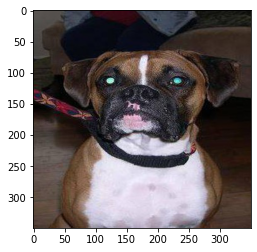

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/Data/dog.4050.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
filenames = os.listdir(r"/content/drive/MyDrive/Data/")
dir = "/content/drive/MyDrive/Data/"
categories=[]
pnj = []
for f_name in filenames:
  print(f_name)
  category=f_name.split('.')[0]
  if category=='dog':
      categories.append(1)
  else:
      categories.append(0)
  imgg = mpimg.imread(os.path.join(dir,f_name))
  pnj.append(imgg)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

dog.4013.jpg
dog.4006.jpg
dog.4015.jpg
dog.4016.jpg
dog.4025.jpg
dog.4002.jpg
dog.4027.jpg
dog.4005.jpg
dog.4026.jpg
dog.4003.jpg
dog.4014.jpg
dog.4036.jpg
dog.4024.jpg
dog.4034.jpg
dog.4023.jpg
dog.4035.jpg
dog.4017.jpg
dog.4028.jpg
dog.4004.jpg
dog.4012.jpg
dog.4001.jpg
dog.4037.jpg
dog.4039.jpg
dog.4046.jpg
dog.4050.jpg
dog.4038.jpg
dog.4048.jpg
dog.4047.jpg
dog.4049.jpg
dog.4045.jpg
cat.4012.jpg
cat.4027.jpg
cat.4036.jpg
cat.4013.jpg
cat.4034.jpg
cat.4017.jpg
cat.4003.jpg
cat.4004.jpg
cat.4014.jpg
cat.4025.jpg
cat.4024.jpg
cat.4037.jpg
cat.4028.jpg
cat.4045.jpg
cat.4016.jpg
cat.4015.jpg
cat.4005.jpg
cat.4002.jpg
cat.4046.jpg
cat.4049.jpg
cat.4001.jpg
cat.4048.jpg
cat.4006.jpg
cat.4026.jpg
cat.4035.jpg
cat.4038.jpg
cat.4023.jpg
cat.4039.jpg
cat.4047.jpg
cat.4050.jpg


In [ ]:
df=pd.DataFrame({
'filename':dir,
'category':categories
})

In [ ]:
pnj=np.asarray(pnj)
categories = np.asarray(categories)

In [ ]:
len(pnj)

60

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


from tensorflow.keras import layers


In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    ])
img=[]
lbl = []
for i in range(len(pnj)) :
  imag = tf.cast(tf.expand_dims(pnj[i]/255, 0), tf.float32)
  for j in range(9):
    augmented_image = data_augmentation(imag)
    img.append(augmented_image[0])
    lbl.append(categories[i])


In [ ]:
len(img)

540

In [ ]:
img=np.asarray(img)
lbl = np.asarray(lbl)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(img,lbl,test_size=0.3,random_state=0)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
x_train.shape
y_train.shape

(378, 2)

In [ ]:
x_test.shape
y_test.shape

(162, 2)

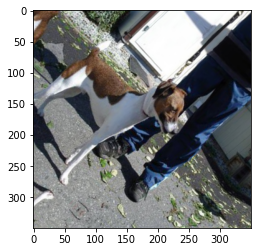

In [ ]:
plt.imshow(x_train[350])


In [ ]:
classifier = Sequential()
classifier.add(Convolution2D(32,kernel_size=3,input_shape=img.shape[1:],activation = "relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))


In [ ]:
classifier.add(Flatten())

In [ ]:
classifier.add(Dense(100,activation="relu",name="layer1"))
classifier.add(Dense(2,activation ="sigmoid",name="final_layer"))
classifier.compile(optimizer="adam",loss="BinaryCrossentropy",metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 174, 174, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 968832)            0         
                                                                 
 layer1 (Dense)              (None, 100)               96883300  
                                                                 
 final_layer (Dense)         (None, 2)                 202       
                                                                 
Total params: 96,884,398
Trainable params: 96,884,398
Non-trainable params: 0
__________________________________________

In [ ]:
classifier.fit(x_train,y_train,validation_data=[x_test,y_test],epochs=10,batch_size=32)

Epoch 1/10
12/12 [==============================] - 41s 3s/step - loss: 24.3403 - accuracy: 0.4735 - val_loss: 6.7194 - val_accuracy: 0.4753
Epoch 2/10
12/12 [==============================] - 35s 3s/step - loss: 3.5631 - accuracy: 0.5212 - val_loss: 3.4295 - val_accuracy: 0.4753
Epoch 3/10
12/12 [==============================] - 35s 3s/step - loss: 1.6031 - accuracy: 0.5873 - val_loss: 1.1686 - val_accuracy: 0.5370
Epoch 4/10
12/12 [==============================] - 35s 3s/step - loss: 0.7075 - accuracy: 0.6799 - val_loss: 0.5535 - val_accuracy: 0.6667
Epoch 5/10
12/12 [==============================] - 37s 3s/step - loss: 0.3480 - accuracy: 0.8598 - val_loss: 0.4628 - val_accuracy: 0.8148
Epoch 6/10
12/12 [==============================] - 36s 3s/step - loss: 0.2627 - accuracy: 0.9127 - val_loss: 0.4281 - val_accuracy: 0.7963
Epoch 7/10
12/12 [==============================] - 36s 3s/step - loss: 0.2048 - accuracy: 0.9444 - val_loss: 0.4311 - val_accuracy: 0.8457
Epoch 8/10
12/12 [=

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['re', 'imag']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from keras import losses
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model


In [ ]:
classifier.evaluate(x_test,y_test)

6/6 [==============================] - 4s 621ms/step - loss: 0.4251 - accuracy: 0.8210


[0.4250871241092682, 0.8209876418113708]

1

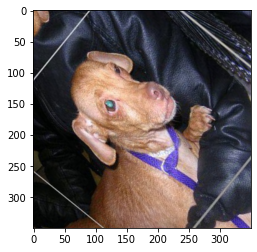

In [ ]:
res_img = x_train[20]
plt.imshow(x_train[20])
res_img=res_img.reshape((1,350,350,3))
a =classifier.predict(res_img) 
b = np.where(a[0] == max(a[0]))
b[0][0]
